# 2021 NLP & AI Coding Test

![](https://item.kakaocdn.net/do/8ad594ffa619c5063075206d55ec79a18f324a0b9c48f77dbce3a43bd11ce785)

- 안녕하세요! 2021 NLP & AI 연구실의 코딩 테스트에 오신 여러분 환영합니다. 👨
- 본 테스트는 파이썬(python)🐍 언어를 이용하여 다양한 프로그래밍 상황에서의 간단한 퀴즈를 통해 여러분들에게 필요한 핵심 역량을 파악하는 것을 목적으로 합니다.
- 여러분들은 이미 인턴으로 NLP & AI 연구실의 인원으로 합류하셨으며 👏, 그 능력의 출중함은 이미 평가되었다 생각합니다. 그러므로 무리하게 정답을 맞추는 것은 본 테스트의 목적은 아니므로 부담 없이 뇌 운동한다 생각하고 참여해주시면 됩니다. 🏝️

In [391]:
# 실행해주세요!
!git clone https://github.com/taeminlee/cote_vol_1

fatal: destination path 'cote_vol_1' already exists and is not an empty directory.


# 세션 1 : 파이썬 아일랜드

![](https://images-na.ssl-images-amazon.com/images/S/pv-target-images/7548d4378a9ebcc60173995446a08014b114efc66e4713a4f292205981a5cf62._RI_V_TTW_.jpg)

### Q1 : KorQuAD 데이터 집합에서 `question` 키의 값만 가지는 리스트를 만들고자 한다. 이를 한줄의 파이썬 코드로 작성하시오.

- KorQuAD 데이터 집합의 스키마는 다음과 같음

```
{
  "version": string
  "data" : [
    "paragraphs" : [
      "qas" : [
        "question" : string,
        "id" : string,
        "answers" : [
          "text" : string,
          "answer_start" integer
        ]
    ]
  ]
}
```

In [392]:
from cote_vol_1.q1 import Q1
import pprint

q1_dataset = Q1.load_dataset()


In [393]:
# answer = [list(map(lambda y: y['question'], qa)) for qa in map(lambda x: x['qas'], data['paragraphs']) for data in q1_dataset['data']]
answer = []
for data in q1_dataset['data']:
    for qa in map(lambda x: x['qas'], data['paragraphs']):
        answer.append(list(map(lambda y: y['question'], qa)))

In [394]:
from itertools import chain
answer = list(chain.from_iterable([list(chain(map(lambda t: t['question'], k))) for k in (map(lambda y: y['qas'] ,paragraph)) for paragraph in map(lambda x: x['paragraphs'] ,q1_dataset['data'])]))
    
len(answer)

5180

In [395]:
# questions = # 여기에 코드를 작성하세요

questions = list(chain.from_iterable(answer))

%time Q1.validate(questions)

AssertionError: 

### Q2 : $n$ 사이즈의 리스트의 각각의 원소 $e$를 검사하여 짝수인 경우 $e^2$ 값으로, 홀수인 경우 $\sqrt{e}$로 변환하는 이터레이터(iterator)를 작성하시오.

In [ ]:
from cote_vol_1.q2 import Q2
import math

q2_dataset = Q2.load_dataset()
print("데이터 집합의 크기 :", len(q2_dataset))

데이터 집합의 크기 : 10000000


In [ ]:
import numpy as np

def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    N, C = 1, 1
    H, W = input_data.shape
    out_h = (H + 2*pad - filter_h) / stride + 1
    out_w = (W + 2*pad - filter_w) / stride + 1

    img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col


class Convolution:
    def __init__(self, W, stride=1, pad=1):
        self.W = W
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        FN, C = 1,1
        FH, FW = self.W.shape
        N, C = 1,1
        H, W = x.shape
        out_h = int(1 + (H + 2 * self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2 * self.pad - FW) / self.stride)

        # 입력 데이터와 필터를 2차원 배열로 전개하고 내적한다.
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T  # 필터 전개
        out = np.dot(col, col_W)

        # reshape에서 -1 : 원소 개수에 맞춰 적절하게 묶어줌.
        # transpose : 다차원 배열의 축 순서를 바꿔줌(N,H,W,C) -> (N,C,H,W)
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        return out


In [ ]:
iterator = Iterator(q2_dataset)
%time Q2.validate(iterator)



정상적으로 실행되었습니다.
CPU times: user 5.24 s, sys: 24.7 ms, total: 5.27 s
Wall time: 5.3 s


### Q3 : 구분 문자로 분절하는 SimpleTokenizer를 상속받아 다음의 tokenizer들을 구현하시오.

- uni-gram tokenizer
  - 예 : `신인 샹송 가수의 신춘 샹송 쇼` -> [`신인`, `샹송`, `가수의`, `신춘`, `샹송`, `쇼`]
- bi-gram tokenizer with stride 1
  - 예 : `신인 샹송 가수의 신춘 샹송 쇼` -> [`신인 샹송`, `샹송 가수의`, `가수의 신춘`, `신춘 샹송`, `샹송 쇼`]
- tri-gram tokenizer with stride 2
  - 예 : `신인 샹송 가수의 신춘 샹송 쇼` -> [`신인 샹송 가수의`, `가수의 신춘 샹송`, `샹송 쇼`]

In [ ]:
test = '신인 샹송 가수의 신춘 샹송 쇼'

test = test.split(' ')
count = len(test)

test
[" ".join(test[i:i+2]) for i in range(0, count-1,1)]


['신인 샹송', '샹송 가수의', '가수의 신춘', '신춘 샹송', '샹송 쇼']

In [ ]:
from cote_vol_1.q3 import Q3
from typing import List

class SimpleTokenizer:
  def __init__(self, delimiter=' '):
    self.delimiter = delimiter
  def tokenize(self, sentence: str) -> List[str]:
    raise NotImplementedError
  def detokenize(self, tokens: List[str]) -> str:
    raise NotImplementedError

In [ ]:
q3_dataset = Q3.load_dataset()

In [ ]:
import itertools

class Tokenizer(SimpleTokenizer):
    def __init__(self, n) -> None:
        super().__init__()
        self.n = n
        if n == 1:
            self.stride = 0
        elif n == 2:
            self.stride = 1
        else:
            self.stride = 2

    def tokenize(self, sentence: str) -> List[str]:
        sentence = sentence.split(self.delimiter)
        count = len(sentence)
        if self.stride == 0:
            return sentence
        elif self.stride == 1:
            if count == 1:
                return sentence
            else:
                return [" ".join(sentence[i:i+2]) for i in range(0, count-1,1)]
        else:
            return [" ".join(sentence[i:i+self.stride+1]) for i in range(0, count,self.stride)]

    def detokenize(self, tokens: List[str]) -> str:
        result = []
        for token in tokens:
            if len(token.split(self.delimiter)) == 1:
                result.append([token])
                continue
            result.append(token.split(self.delimiter)[:-1])

        try:
            result.append(token.split(self.delimiter)[1:])
        except:
            print(tokens)

        return " ".join(chain.from_iterable(result))




In [ ]:
test = '신인'
tk = Tokenizer(2)
(tk.tokenize(test))

['신인']

In [ ]:
unigram_tokenizer = Tokenizer(1)
bigram_tokenizer = Tokenizer(2)
trigram_tokenizer = Tokenizer(3)
%time Q3.validate(unigram_tokenizer)
%time Q3.validate(bigram_tokenizer)
%time Q3.validate(trigram_tokenizer)

정상적으로 실행되었습니다.
CPU times: user 519 µs, sys: 64 µs, total: 583 µs
Wall time: 563 µs
정상적으로 실행되었습니다.
CPU times: user 839 µs, sys: 111 µs, total: 950 µs
Wall time: 915 µs
정상적으로 실행되었습니다.
CPU times: user 567 µs, sys: 11 µs, total: 578 µs
Wall time: 572 µs


# 세션 2 : 넘파이 정글

![](https://creativemazes.com.au/wp-content/uploads/2019/04/CreativeMazes_Mandurah_HighRes-6.jpg)

### Q4 : Numpy를 이용하여 linear regression을 구현하시오.

- input : $x_{i} \in \mathbb{R}$
- output : $y_{i} \in \mathbb{R}$
- error function : MSE
- learning algorithm : gradient descent

X: [1 2 4 3 5]
Y: [1 3 3 2 5]


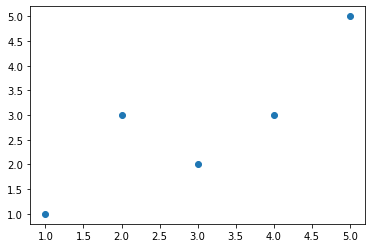

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1,2,4,3,5])
Y = np.array([1,3,3,2,5])

print("X:", X)
print("Y:", Y)

plt.scatter(X, Y)

In [ ]:
class LinearModel:
  def __init__(self):
    self.W = 1.
    self.b = 0.
    self.lr = 0.001
  def forward(self, X: np.array) -> (np.array, np.array):
    self.X = X
    y_hat = self.W*self.X + self.b
    self.error = np.subtract(Y, y_hat)
    loss = np.square(self.error).mean()
    return y_hat, loss
    
  def backward(self, loss: np.array):
    grad_b = -2 * self.error.mean()
    grad_W = -2 * (X*self.error).mean()

    self.b = self.b - self.lr * grad_b
    self.W = self.W - self.lr * grad_W




In [ ]:
epochs = 10000
model = LinearModel()
for _ in range(epochs):
  y_hat, loss = model.forward(X)
  model.backward(loss)
print(y_hat)

[1.18960079 1.99358468 3.60155245 2.79756856 4.40553634]


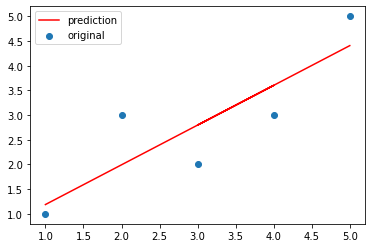

In [ ]:
X = np.array([1,2,4,3,5])
Y = np.array([1,3,3,2,5])
plt.scatter(X, Y, label='original')
plt.plot(X, y_hat, label='prediction', color='r')
plt.legend()
plt.show()

In [ ]:
X

array([1, 2, 4, 3, 5])

### Q5 : Numpy를 이용하여 Convolution 2d 연산을 구현하시오.

- kernel size : 3
- stride : 1
- padding : 1
- bias는 사용하지 않음

![](https://cdn-images-1.medium.com/max/1200/1*1okwhewf5KCtIPaFib4XaA.gif)

In [ ]:
from cote_vol_1.q5 import Q5

x, w = Q5.load_dataset()

In [ ]:
x[0]

array([-0.46023749, -1.06326753, -1.04604476,  0.62465838,  1.43209722,
        0.01731633, -0.07912325, -1.12343883,  0.11588124, -0.09295656])

In [ ]:
def convolve2D(image, kernel=3, padding=1, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

array([[ 3.03282426, -3.31324729, -0.17478491,  1.64618309,  0.34482736,
         1.17784524,  1.70631659, -5.46013138],
       [-5.47808012,  3.63081071, -0.06319664, -0.34897281, -1.61060043,
         0.01255437,  0.2128797 , -1.03392474],
       [ 4.76799711, -1.35651451, -4.14095193, -0.36380501, -0.90612905,
         0.88944909,  1.39370274, -2.86781856],
       [-3.79464502, -2.72566077,  0.24904108, -2.56583494,  0.95849242,
         0.25402235, -0.14211284, -1.53274332],
       [ 3.47379674, -3.3117733 ,  1.08904543, -4.06525544, -1.24600125,
         2.21866519, -0.79877282,  1.16234994],
       [ 1.72445141,  2.24930017, -3.55739114, -2.07216233,  3.37657742,
        -2.53829507,  0.98325574,  0.71475791],
       [-0.03957643,  1.40478965, -0.62661715,  1.77912956, -2.61254927,
        -1.13272091, -5.18078571,  0.63501733],
       [ 2.61824974, -1.44052299, -0.2468395 ,  1.17653474, -0.74087091,
         1.05423505,  1.53394047,  2.33300335]])

In [ ]:
# conv2d 연산 결과를 자유롭게 작성하세요
y = convolution2d(x, w)
Q5.validate(y)

AssertionError: 

# 세션3 : 퀴즈 타임

![](https://blog.hubspot.com/hubfs/google-quiz.jpg)

### Q6 : 주어진 리스트의 단어 각각에 `은`/`는` 조사를 적절히 붙여주는 함수를 작성하시오.

- Tip : 종성 유무에 따라 적절한 조사가 정해집니다. 예를 들어, 종성이 있으면 `은` 종성이 없으면 `는`이 붙어야 합니다. `애플은` | `사과는`

In [407]:
from cote_vol_1.q6 import Q6

dataset = Q6.load_dataset()

In [408]:
dataset[0]

'이상해씨'

In [427]:
import re
"""
    초성 중성 종성 분리 하기
	유니코드 한글은 0xAC00 으로부터
	초성 19개, 중성21개, 종성28개로 이루어지고
	이들을 조합한 11,172개의 문자를 갖는다.
	한글코드의 값 = ((초성 * 21) + 중성) * 28 + 종성 + 0xAC00
	(0xAC00은 'ㄱ'의 코드값)
	따라서 다음과 같은 계산 식이 구해진다.
	유니코드 한글 문자 코드 값이 X일 때,
	초성 = ((X - 0xAC00) / 28) / 21
	중성 = ((X - 0xAC00) / 28) % 21
	종성 = (X - 0xAC00) % 28
	이 때 초성, 중성, 종성의 값은 각 소리 글자의 코드값이 아니라
	이들이 각각 몇 번째 문자인가를 나타내기 때문에 다음과 같이 다시 처리한다.
	초성문자코드 = 초성 + 0x1100 //('ㄱ')
	중성문자코드 = 중성 + 0x1161 // ('ㅏ')
	종성문자코드 = 종성 + 0x11A8 - 1 // (종성이 없는 경우가 있으므로 1을 뺌)
"""

# 유니코드 한글 시작 : 44032, 끝 : 55199
BASE_CODE, CHOSUNG, JUNGSUNG = 44032, 588, 28

# 초성 리스트. 00 ~ 18
CHOSUNG_LIST = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']

# 중성 리스트. 00 ~ 20
JUNGSUNG_LIST = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']

# 종성 리스트. 00 ~ 27 + 1(1개 없음)
JONGSUNG_LIST = [' ', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']

def convert(test_keyword):
    JONGSUNG_FLAG = False
    split_keyword_list = test_keyword[-1]
    #print(split_keyword_list)

    result = list()
    for keyword in split_keyword_list:
        # 한글 여부 check 후 분리
        if re.match('.*[ㄱ-ㅎㅏ-ㅣ가-힣]+.*', keyword) is not None:
            char_code = ord(keyword) - BASE_CODE
            char1 = int(char_code / CHOSUNG)
            result.append(CHOSUNG_LIST[char1])
            #print('초성 : {}'.format(CHOSUNG_LIST[char1]))
            char2 = int((char_code - (CHOSUNG * char1)) / JUNGSUNG)
            result.append(JUNGSUNG_LIST[char2])
            #print('중성 : {}'.format(JUNGSUNG_LIST[char2]))
            char3 = int((char_code - (CHOSUNG * char1) - (JUNGSUNG * char2)))
            if char3==0:
                result.append('#')
            else:
                result.append(JONGSUNG_LIST[char3])
                JONGSUNG_FLAG = True
            # print('종성 : {}'.format(JONGSUNG_LIST[char3]))
        else:
            split_keyword_list = test_keyword[-2]
            test_keyword += convert(split_keyword_list)[-1]
            return test_keyword
    # result
    if not JONGSUNG_FLAG:
        test_keyword += '는'
    else:
        test_keyword += '은'

    return test_keyword



convert('폴리곤Z')

'폴리곤Z은'

In [431]:
josa_append_dataset = list(map(convert, dataset))
Q6.validate(josa_append_dataset)

정상적으로 실행되었습니다.


### Q7 : 토큰화된 문장의 일부를 마스킹 처리하여 언어 모형을 학습하고자 합니다. 토큰화된 리스트가 주어졌을 때, 다음의 규칙을 준수하는 마스킹 된 데이터 집합을 만들어 보세요!

- 마스킹 토큰은 `<mask>` 으로 표현합니다.
- 마스킹 토큰의 id는 6번 입니다.

> The training data generator chooses 15% of the token positions at random for
prediction. If the i-th token is chosen, we replace the i-th token with (1) the [MASK] token 80% of the time (2) a random token 10% of the time (3) the unchanged i-th token 10% of the time.

In [397]:
!pip install datasets
!pip install transformers

In [398]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("skt/kogpt2-base-v2")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [399]:
from datasets import load_dataset
dataset = load_dataset('kor_ner')
texts = [record['text'] for record in dataset['train']]

Using custom data configuration default
Reusing dataset kor_ner (/Users/seungjun/.cache/huggingface/datasets/kor_ner/default/1.1.0/1f019c13620cd0f9d3a4b79c684b0b3e2ece528a306b9f5a1be5c4154d405c02)


In [400]:
# 토큰화 리스트
tokens = [tokenizer.tokenize(text) for text in texts]
# 토큰 ID화 리스트
token_ids = [tokenizer.encode(text) for text in texts]

In [401]:
print("토큰:", tokens[0][:10],"...")
print("ID:", token_ids[0][:10],"...")

토큰: ['▁나도', '▁때', '늦', '은', '▁홍', '길', '동이', '보다는', '▁이', '▁사회의'] ...
ID: [35704, 9068, 7167, 8135, 9722, 6962, 11209, 10497, 9018, 12212] ...


In [402]:
# 자유롭게 마스킹된 토큰 리스트 (혹은 토큰 ID 리스트) 을 만들어보세요!

# 마무리

![](https://item.kakaocdn.net/do/0936dbb0aaa6270bd577ad286a1525aa8b566dca82634c93f811198148a26065)

고생이 많으셨습니다!

마지막으로, colab 에서 저장 후 `파일` -> `다운로드` 하여 ipynb 파일을 카톡방이나, taeminlee@korea.ac.kr 으로 전송해주세요 😊

그럼 다음에 또 봐요~~